In [47]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import AutoMinorLocator
# local imports
import DataAndPlotting as my


# Data

In [48]:
# store files names for all datasets
filenames: dict[str,str] = {
   'ap2_t1'    : my.path_data + '1-ap2_t1.csv', 
   'ap2_t2'    : my.path_data + '2-ap2_t2.csv', 
} # ap==aperture, t==trial

tables: dict[str, dict[str, np.array]] = my.UnpackAllTables(filenames)

ap2_t1 columns:	 ['VAK [V]', 'I_356 [1e-12 A]', 'I_405 [1e-12 A]', 'I_436 [1e-12 A]', 'I_546 [1e-12 A]', 'I_577 [1e-12 A]']
ap2_t2 columns:	 ['VAK [V]', 'I_356 [1e-12 A]', 'I_405 [1e-12 A]', 'I_436 [1e-12 A]', 'I_546 [1e-12 A]', 'I_577 [1e-12 A]']


In [49]:
colorDict = {
    '356 nm' : '#303030', # '#000000',
    '405 nm' : '#8200c8',
    '436 nm' : '#1d00ff',
    '546 nm' : '#569100', # '#96ff00',
    '577 nm' : '#b6bd02', # '#f6ff00',
}
colors = list(colorDict.values())
colors_dark = [my.darken_color(c, 1.2) for c in colors]

# Plot

In [50]:
def PlotXmanyY(
    x: list[np.array], # x axis data points
    y: list[np.array], # y axis data points
    yleg : list[str], # legend lables 
    c : list, # colors
    vlines: list[float] = [], # plot vertical lines
    xerr: float = 0,    # error on x axis
    yerr: float = 0,    # error on y axis
    xlab: str = '', # label on x axis 
    ylab: str = '', # label on y axis
    linestyle = '-',   # style of xy curve line
    xlim: list = None,  # x axis range 
    ylim: list = None,  # y axis range 
    logScale: bool = False,
    fileName: str = ''  # filename to save the figure as
) : 
    """Plotting function for x and y data arrays."""
    # formatting 
    my.SetStyle()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if(xlim != None) : plt.xlim(xlim)
    if(ylim != None) : plt.ylim(ylim)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    if(logScale) : ax.set_yscale('log')
    for v in vlines : 
        plt.axvline(v, c='k',linewidth=0.8)
    # data
    for xi,yi,yl,ci in zip(x,y,yleg,c) : 
        plt.errorbar(xi, yi, yerr=yerr, xerr=xerr, elinewidth=1.5, c=ci, linestyle=linestyle, linewidth=0.5, label=yl)
    if( yleg[0] != None) : plt.legend(loc='upper left')
    # finish 
    if(fileName != '') : my.Save(fileName)
    plt.show()

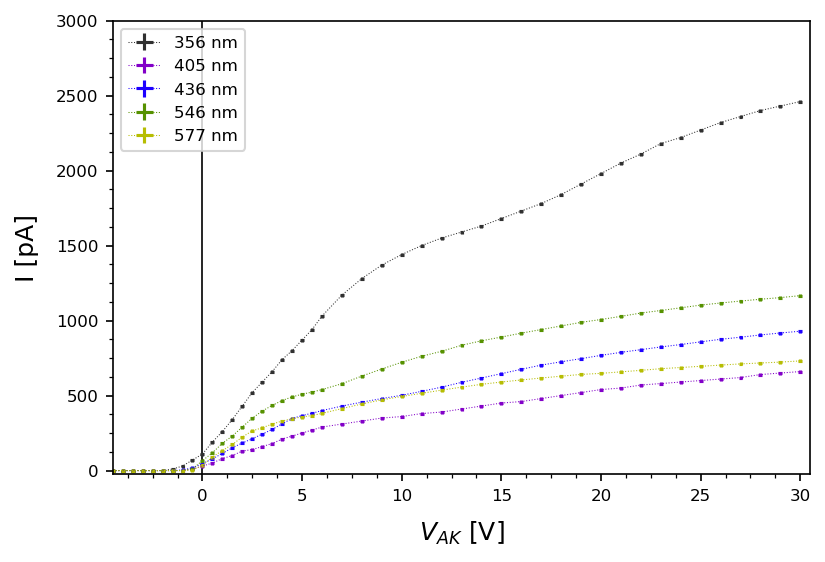

In [51]:
PlotXmanyY(
    x = [tables['ap2_t1']['VAK [V]']]*5,
    y = [
        tables['ap2_t1']['I_356 [1e-12 A]'], 
        tables['ap2_t1']['I_405 [1e-12 A]'], 
        tables['ap2_t1']['I_436 [1e-12 A]'], 
        tables['ap2_t1']['I_546 [1e-12 A]'], 
        tables['ap2_t1']['I_577 [1e-12 A]'], 
    ],
    yleg = [ '356 nm', '405 nm', '436 nm', '546 nm', '577 nm' ],
    c = colors,
    vlines = [0],
    xerr = 0.1,
    yerr = 10,
    xlab = '$V_{AK}$ [V]',
    ylab = 'I [pA]',
    linestyle = ':',
    xlim = (-4.5, 30.5),
    ylim = (-20, 3000),
    # logScale = True,
    fileName = my.path_fig + 'ap2_t1.png'
)

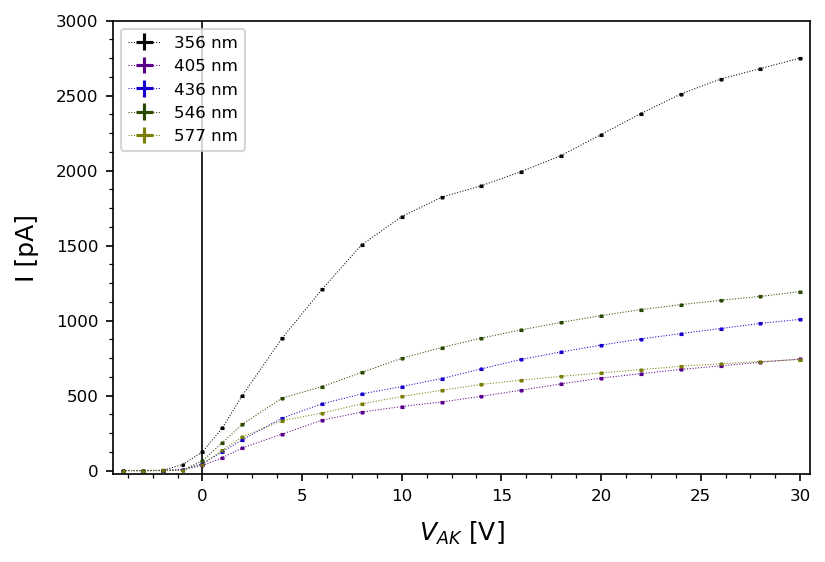

In [52]:
PlotXmanyY(
    x = [tables['ap2_t2']['VAK [V]']]*5,
    y = [
        tables['ap2_t2']['I_356 [1e-12 A]'], 
        tables['ap2_t2']['I_405 [1e-12 A]'], 
        tables['ap2_t2']['I_436 [1e-12 A]'], 
        tables['ap2_t2']['I_546 [1e-12 A]'], 
        tables['ap2_t2']['I_577 [1e-12 A]'], 
    ],
    yleg = [ '356 nm', '405 nm', '436 nm', '546 nm', '577 nm' ],
    c = colors_dark,
    vlines = [0],
    xerr = 0.1,
    yerr = 10,
    xlab = '$V_{AK}$ [V]',
    ylab = 'I [pA]',
    linestyle = ':',
    xlim = (-4.5, 30.5),
    ylim = (-20, 3000),
    # logScale = True,
    fileName = my.path_fig + 'ap2_t2.png'
)

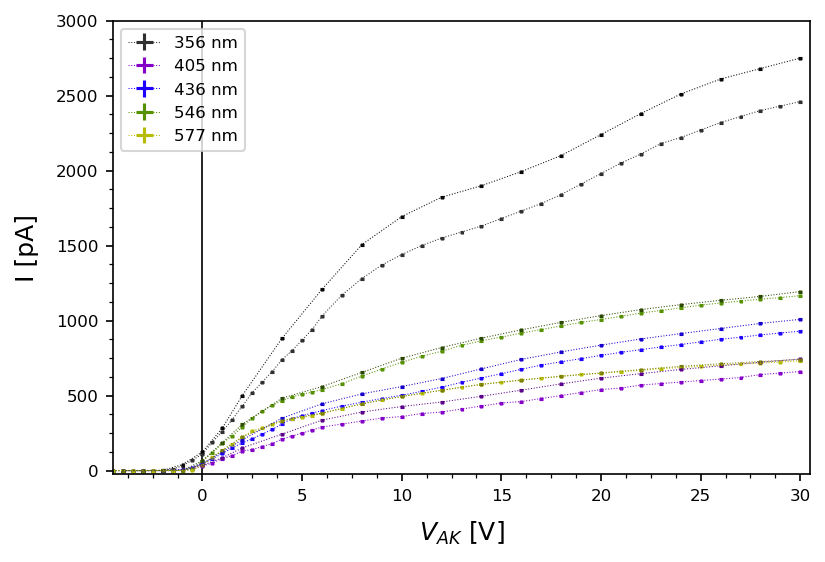

In [53]:
PlotXmanyY(
    x = [tables['ap2_t1']['VAK [V]']]*5 + [tables['ap2_t2']['VAK [V]']]*5,
    y = [
        # trial 1
        tables['ap2_t1']['I_356 [1e-12 A]'], 
        tables['ap2_t1']['I_405 [1e-12 A]'], 
        tables['ap2_t1']['I_436 [1e-12 A]'], 
        tables['ap2_t1']['I_546 [1e-12 A]'], 
        tables['ap2_t1']['I_577 [1e-12 A]'], 
        # trial 2
        tables['ap2_t2']['I_356 [1e-12 A]'], 
        tables['ap2_t2']['I_405 [1e-12 A]'], 
        tables['ap2_t2']['I_436 [1e-12 A]'], 
        tables['ap2_t2']['I_546 [1e-12 A]'], 
        tables['ap2_t2']['I_577 [1e-12 A]'], 
    ],
    yleg = [ '356 nm', '405 nm', '436 nm', '546 nm', '577 nm', None,None,None,None,None ],
    c = colors + colors_dark,
    vlines = [0],
    xerr = 0.1,
    yerr = 10,
    xlab = '$V_{AK}$ [V]',
    ylab = 'I [pA]',
    linestyle = ':',
    xlim = (-4.5, 30.5),
    ylim = (-20, 3000),
    # logScale = True,
    fileName = my.path_fig + 'ap2_t12.png'
)

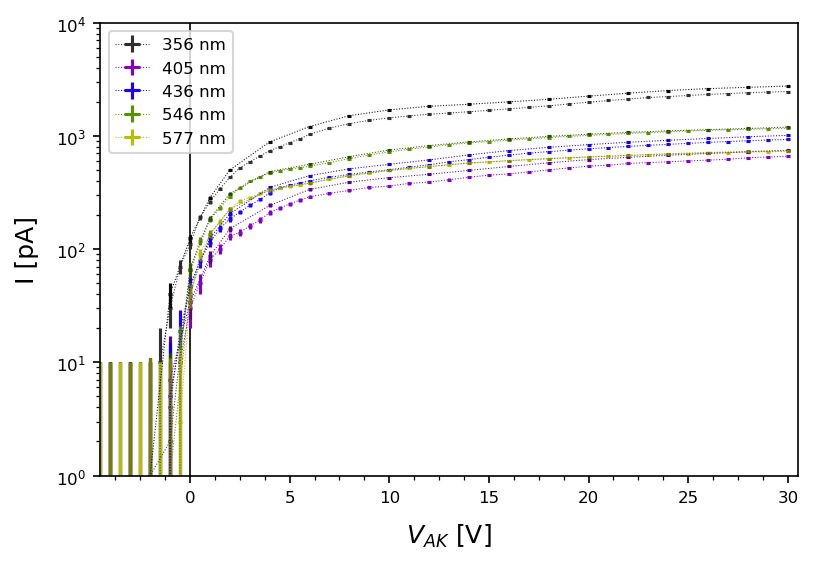

In [54]:
PlotXmanyY(
    x = [tables['ap2_t1']['VAK [V]']]*5 + [tables['ap2_t2']['VAK [V]']]*5,
    y = [
        # trial 1
        tables['ap2_t1']['I_356 [1e-12 A]'], 
        tables['ap2_t1']['I_405 [1e-12 A]'], 
        tables['ap2_t1']['I_436 [1e-12 A]'], 
        tables['ap2_t1']['I_546 [1e-12 A]'], 
        tables['ap2_t1']['I_577 [1e-12 A]'], 
        # trial 2
        tables['ap2_t2']['I_356 [1e-12 A]'], 
        tables['ap2_t2']['I_405 [1e-12 A]'], 
        tables['ap2_t2']['I_436 [1e-12 A]'], 
        tables['ap2_t2']['I_546 [1e-12 A]'], 
        tables['ap2_t2']['I_577 [1e-12 A]'], 
    ],
    yleg = [ '356 nm', '405 nm', '436 nm', '546 nm', '577 nm', None,None,None,None,None ],
    c = colors + colors_dark,
    vlines = [0],
    xerr = 0.1,
    yerr = 10,
    xlab = '$V_{AK}$ [V]',
    ylab = 'I [pA]',
    linestyle = ':',
    xlim = (-4.5, 30.5),
    ylim = (1, 1E4),
    logScale = True,
    fileName = my.path_fig + 'ap2_t12_log.png'
)

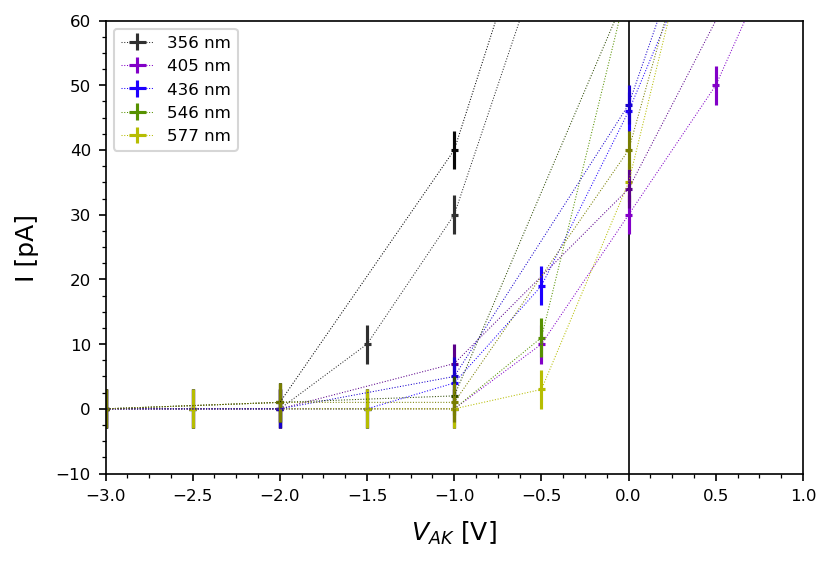

In [55]:
PlotXmanyY(
    x = [tables['ap2_t1']['VAK [V]']]*5 + [tables['ap2_t2']['VAK [V]']]*5,
    y = [
        # trial 1
        tables['ap2_t1']['I_356 [1e-12 A]'], 
        tables['ap2_t1']['I_405 [1e-12 A]'], 
        tables['ap2_t1']['I_436 [1e-12 A]'], 
        tables['ap2_t1']['I_546 [1e-12 A]'], 
        tables['ap2_t1']['I_577 [1e-12 A]'], 
        # trial 2
        tables['ap2_t2']['I_356 [1e-12 A]'], 
        tables['ap2_t2']['I_405 [1e-12 A]'], 
        tables['ap2_t2']['I_436 [1e-12 A]'], 
        tables['ap2_t2']['I_546 [1e-12 A]'], 
        tables['ap2_t2']['I_577 [1e-12 A]'], 
    ],
    yleg = [ '356 nm', '405 nm', '436 nm', '546 nm', '577 nm', None,None,None,None,None ],
    c = colors + colors_dark,
    vlines = [0],
    xerr = 0.02,
    yerr = 3,
    xlab = '$V_{AK}$ [V]',
    ylab = 'I [pA]',
    linestyle = ':',
    xlim = (-3, 1),
    ylim = (-10, 60),
    # logScale = True,
    # fileName = my.path_fig + 'ap2_t12_zoom.png'
)

In [56]:
def GetBreak(tables, experiment, xkey, ykey, threshold=2) : 
    return tables[experiment][xkey] [ # select xs where y is nonzero
                tables[experiment][ykey]>= threshold # get y indices above threshold
            ] [0] # first index is smallest

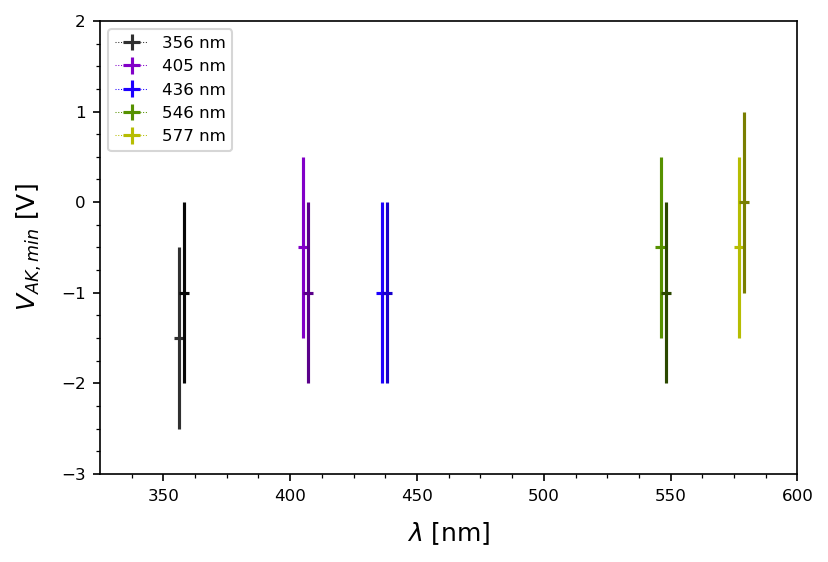

In [57]:
wavelengths = [356,405,436,546,577]
wavelengths_off = [x+2 for x in wavelengths]

PlotXmanyY(
    x = wavelengths + wavelengths_off, 
    y = [
        # trial 1
        GetBreak(tables, 'ap2_t1', 'VAK [V]', 'I_356 [1e-12 A]'),
        GetBreak(tables, 'ap2_t1', 'VAK [V]', 'I_405 [1e-12 A]'),
        GetBreak(tables, 'ap2_t1', 'VAK [V]', 'I_436 [1e-12 A]'),
        GetBreak(tables, 'ap2_t1', 'VAK [V]', 'I_546 [1e-12 A]'),
        GetBreak(tables, 'ap2_t1', 'VAK [V]', 'I_577 [1e-12 A]'),
        # trial 2
        GetBreak(tables, 'ap2_t2', 'VAK [V]', 'I_356 [1e-12 A]'),
        GetBreak(tables, 'ap2_t2', 'VAK [V]', 'I_405 [1e-12 A]'),
        GetBreak(tables, 'ap2_t2', 'VAK [V]', 'I_436 [1e-12 A]'),
        GetBreak(tables, 'ap2_t2', 'VAK [V]', 'I_546 [1e-12 A]'),
        GetBreak(tables, 'ap2_t2', 'VAK [V]', 'I_577 [1e-12 A]'),
    ],
    yleg = [ '356 nm', '405 nm', '436 nm', '546 nm', '577 nm', None,None,None,None,None ],
    c = colors + colors_dark,
    # vlines = [0],
    xerr = 2,
    yerr = 1,
    xlab = '$\lambda$ [nm]',
    ylab = '$V_{AK,min}$ [V]',
    linestyle = ':',
    xlim = (325, 600),
    ylim = (-3, 2),
    # logScale = True,
    fileName = my.path_fig + 'ap2_t12_VAKmin.png'
)